# Methodology
- always went back to the best performming model so far and adjusted from there


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [2]:


x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline()
# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])     


## Multivariate LSTM Model 

- 200 Input Neurons on an Input Layer
- 2 Dense layers with 100 and 200 neurals
- relu function for activation

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(200, activation='relu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2739.9165 - root_mean_squared_error: 50.5104 - val_loss: 989.8453 - val_root_mean_squared_error: 31.4618
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1637.4579 - root_mean_squared_error: 40.4522 - val_loss: 1070.3225 - val_root_mean_squared_error: 32.7158
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1358.6940 - root_mean_squared_error: 36.8472 - val_loss: 1009.1602 - val_root_mean_squared_error: 31.7673
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1344.2843 - root_mean_squared_error: 36.6518 - val_loss: 1021.9000 - val_root_mean_squared_error: 31.9672
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1280.4602 - root_mean_squared_error: 35.7602 - val_loss: 979.4425 - val_root_mean_squared_error: 31.2960
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1241.7125 - root_mean_squared_error: 35.2226 - val_loss: 992.8774 - val_root_mean_squared_erro

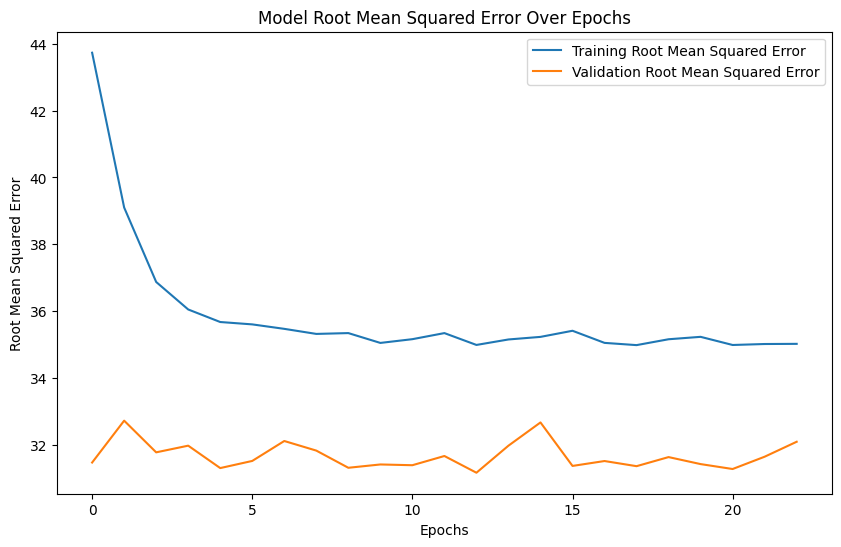

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation Root Mean Squared Error')
plt.title('Model Root Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

## Multivariate LSTM 
- 300 neurons activation layer
- 3 activation layers

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(300, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(200, activation='relu'),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")


Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 3005.7490 - root_mean_squared_error: 53.7582 - val_loss: 1087.2621 - val_root_mean_squared_error: 32.9737
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1727.7030 - root_mean_squared_error: 41.5455 - val_loss: 1028.3612 - val_root_mean_squared_error: 32.0681
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1627.1204 - root_mean_squared_error: 40.3198 - val_loss: 1203.5359 - val_root_mean_squared_error: 34.6920
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1600.0271 - root_mean_squared_error: 39.9919 - val_loss: 1081.5300 - val_root_mean_squared_error: 32.8866
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1643.3606 - root_mean_squared_error: 40.5299 - val_loss: 1008.8752 - val_root_mean_squared_error: 31.7628
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1556.7518 - root_mean_squared_error: 39.4449 - val_loss: 1102.7339 - val_root_mean_squared_error: 33.207

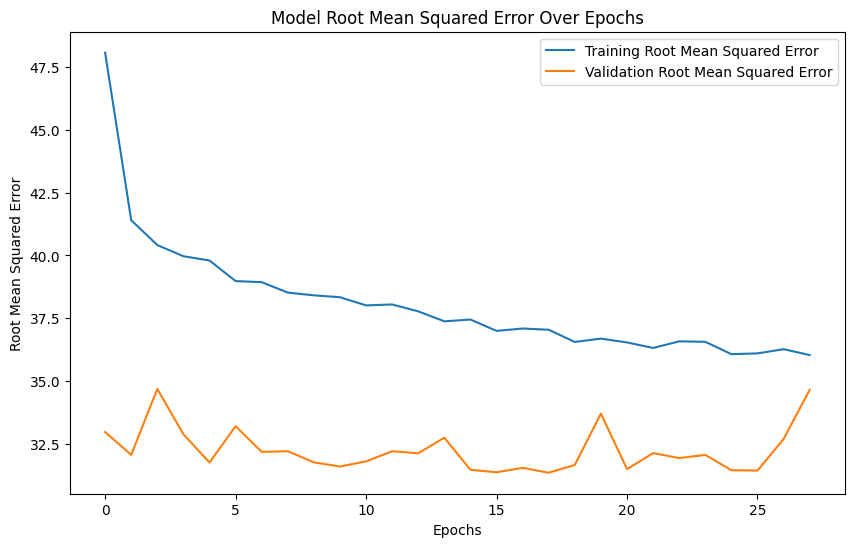

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation Root Mean Squared Error')
plt.title('Model Root Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

This proved to have worse performence, then the previous model

## Multivariate LSTM - Simplified
- 200 neurons input layer
- 1 Dense Layer

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")


Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3232.9004 - root_mean_squared_error: 53.9659 - val_loss: 1012.5532 - val_root_mean_squared_error: 31.8206
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1491.2847 - root_mean_squared_error: 38.5987 - val_loss: 1051.8865 - val_root_mean_squared_error: 32.4328
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1396.1418 - root_mean_squared_error: 37.3597 - val_loss: 1012.5053 - val_root_mean_squared_error: 31.8199
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1407.9496 - root_mean_squared_error: 37.5078 - val_loss: 1052.4105 - val_root_mean_squared_error: 32.4409
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1288.7448 - root_mean_squared_error: 35.8839 - val_loss: 1000.3769 - val_root_mean_squared_error: 31.6287
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1330.9860 - root_mean_squared_error: 36.4777 - val_loss: 1008.6041 - val_root_mean_squared_error: 31.758

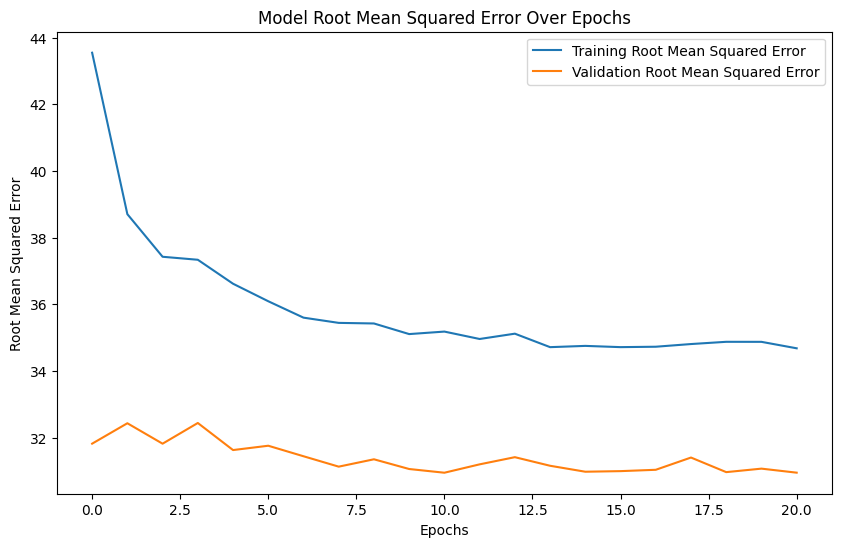

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation Root Mean Squared Error')
plt.title('Model Root Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

Looks like simpler model performed the best, therefore going this direction

## LSTM
- 300 input layers, 0.6 Dropout
- 200 dense layers, 0.5 Dropout
- keeping it only 3 layers, but increase amount of neurons

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(300, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.6),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")


Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2876.4995 - root_mean_squared_error: 51.3889 - val_loss: 1121.7156 - val_root_mean_squared_error: 33.4920
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1562.4414 - root_mean_squared_error: 39.5222 - val_loss: 999.8227 - val_root_mean_squared_error: 31.6200
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1468.3162 - root_mean_squared_error: 38.3125 - val_loss: 1079.6310 - val_root_mean_squared_error: 32.8577
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1342.3793 - root_mean_squared_error: 36.6197 - val_loss: 992.8210 - val_root_mean_squared_error: 31.5091
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1278.6617 - root_mean_squared_error: 35.7383 - val_loss: 994.6669 - val_root_mean_squared_error: 31.5383
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1252.9368 - root_mean_squared_error: 35.3896 - val_loss: 992.1667 - val_root_mean_squared_error: 31.4987
Ep

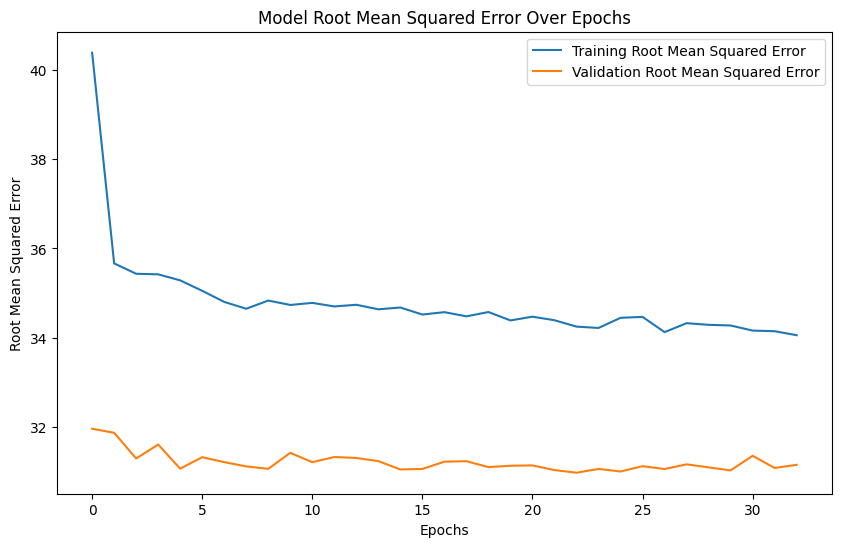

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training Root Mean Squared Error')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation Root Mean Squared Error')
plt.title('Model Root Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

LSTM Model
- 3 layers, changing the activation function to selu

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Flatten(),
    Dense(100, activation='selu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2785.2908 - root_mean_squared_error: 49.9377 - val_loss: 1021.5078 - val_root_mean_squared_error: 31.9610
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1293.2664 - root_mean_squared_error: 35.9572 - val_loss: 1015.7156 - val_root_mean_squared_error: 31.8703
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1227.5804 - root_mean_squared_error: 35.0299 - val_loss: 979.3685 - val_root_mean_squared_error: 31.2949
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1245.7498 - root_mean_squared_error: 35.2870 - val_loss: 999.0457 - val_root_mean_squared_error: 31.6077
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1257.6528 - root_mean_squared_error: 35.4595 - val_loss: 965.1322 - val_root_mean_squared_error: 31.0666
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1254.0138 - root_mean_squared_error: 35.4034 - val_loss: 981.1981 - val_root_mean_squared_error: 31.3241
Ep

## Adding One More Layer, trying selu and relu together

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
multivariate_lstm = tf.keras.models.Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.4),
    Dense(200, activation = 'relu'),
    Dropout(0.6),
    Flatten(),
    Dense(100, activation='selu'),
    Dropout(0.4),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2460.1523 - root_mean_squared_error: 47.8920 - val_loss: 1144.5819 - val_root_mean_squared_error: 33.8317
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1475.3036 - root_mean_squared_error: 38.3856 - val_loss: 978.3514 - val_root_mean_squared_error: 31.2786
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1445.7218 - root_mean_squared_error: 38.0101 - val_loss: 1092.7515 - val_root_mean_squared_error: 33.0568
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1299.9432 - root_mean_squared_error: 36.0478 - val_loss: 981.1813 - val_root_mean_squared_error: 31.3238
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1385.5941 - root_mean_squared_error: 37.2072 - val_loss: 991.8921 - val_root_mean_squared_error: 31.4943
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1322.7942 - root_mean_squared_error: 36.3621 - val_loss: 1005.6763 - val_root_mean_squared_error: 31.7124
E

## TimeDistributed Layer Expiriment
- selu function

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Epoch 1/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2370.9714 - root_mean_squared_error: 45.7677 - val_loss: 989.7690 - val_root_mean_squared_error: 31.4606
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1047.7832 - root_mean_squared_error: 32.3576 - val_loss: 996.0524 - val_root_mean_squared_error: 31.5603
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1032.9871 - root_mean_squared_error: 32.1321 - val_loss: 990.2910 - val_root_mean_squared_error: 31.4689
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1092.7126 - root_mean_squared_error: 33.0378 - val_loss: 998.3424 - val_root_mean_squared_error: 31.5966
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1116.7942 - root_mean_squared_error: 33.3772 - val_loss: 973.7540 - val_root_mean_squared_error: 31.2050
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1032.9694 - root_mean_squared_error: 32.1279 - val_loss: 976.1458 - val_root_mean_squared_error: 

## TimeDistributed
- relu function

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='relu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2714.9146 - root_mean_squared_error: 48.3935 - val_loss: 994.3536 - val_root_mean_squared_error: 31.5334
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1043.8848 - root_mean_squared_error: 32.3021 - val_loss: 990.3284 - val_root_mean_squared_error: 31.4695
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1074.3821 - root_mean_squared_error: 32.7659 - val_loss: 962.8771 - val_root_mean_squared_error: 31.0303
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1010.7933 - root_mean_squared_error: 31.7869 - val_loss: 981.3670 - val_root_mean_squared_error: 31.3268
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1028.2399 - root_mean_squared_error: 32.0550 - val_loss: 967.3807 - val_root_mean_squared_error: 31.1027
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1029.2488 - root_mean_squared_error: 32.0709 - val_loss: 965.9918 - val_root_mean_squared_error: 31.0804
Epoc

## Time Distributed Layers - 2
- 2 layers, relu and selu

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='relu')), 
    Dropout(0.3),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.3),
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2252.9548 - root_mean_squared_error: 45.6294 - val_loss: 982.0152 - val_root_mean_squared_error: 31.3371
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1307.6841 - root_mean_squared_error: 36.1496 - val_loss: 998.5743 - val_root_mean_squared_error: 31.6002
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1162.4926 - root_mean_squared_error: 34.0796 - val_loss: 1002.4383 - val_root_mean_squared_error: 31.6613
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1230.7589 - root_mean_squared_error: 35.0724 - val_loss: 973.0430 - val_root_mean_squared_error: 31.1936
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1233.4669 - root_mean_squared_error: 35.1163 - val_loss: 994.2258 - val_root_mean_squared_error: 31.5313
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1213.9490 - root_mean_squared_error: 34.8265 - val_loss: 999.5682 - val_root_mean_squared_error: 31.6159
Epo

More layers did not seem to improve the performance

## Timedistributed, 4 layers

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(200, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(50, activation='selu')), 
    Dropout(0.3),
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2261.6567 - root_mean_squared_error: 46.0019 - val_loss: 1077.1570 - val_root_mean_squared_error: 32.8201
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1422.7113 - root_mean_squared_error: 37.7086 - val_loss: 987.1863 - val_root_mean_squared_error: 31.4195
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 1433.9342 - root_mean_squared_error: 37.8511 - val_loss: 1036.0898 - val_root_mean_squared_error: 32.1884
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 1429.6360 - root_mean_squared_error: 37.7991 - val_loss: 1097.3339 - val_root_mean_squared_error: 33.1260
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1344.4020 - root_mean_squared_error: 36.6542 - val_loss: 977.3707 - val_root_mean_squared_error: 31.2629
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1406.1655 - root_mean_squared_error: 37.4840 - val_loss: 1023.5928 - val_root_mean_squared_error: 31.993

Adding extra layers did not seem to improve performance

## NO LSTM, Time Distributed layers only

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    TimeDistributed(Dense(200, activation='relu'),
                    input_shape=(x_train.shape[1], x_train.shape[2]),),
    TimeDistributed(Dense(200, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.3),
    TimeDistributed(Dense(50, activation='selu')), 
    Dropout(0.3),
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2151.8376 - root_mean_squared_error: 45.4033 - val_loss: 1001.4138 - val_root_mean_squared_error: 31.6451
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1406.4052 - root_mean_squared_error: 37.4858 - val_loss: 979.5419 - val_root_mean_squared_error: 31.2976
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1341.6785 - root_mean_squared_error: 36.6200 - val_loss: 977.1418 - val_root_mean_squared_error: 31.2593
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1288.1079 - root_mean_squared_error: 35.8843 - val_loss: 977.9415 - val_root_mean_squared_error: 31.2721
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1335.6035 - root_mean_squared_error: 36.5424 - val_loss: 977.6062 - val_root_mean_squared_error: 31.2667
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1323.9291 - root_mean_squared_error: 36.3699 - val_loss: 990.2719 - val_root_mean_squared_error: 31.4686
Epo

Time Distributed MLP
- inspired by https://www.kaggle.com/code/dimitriosroussis/electricity-price-forecasting-with-dnns-eda

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    TimeDistributed(Dense(200, activation='relu'),
                    input_shape=(x_train.shape[1], x_train.shape[2]),),
    TimeDistributed(Dense(150, activation='relu')), 
    TimeDistributed(Dense(100, activation='relu')), 
    TimeDistributed(Dense(50, activation='relu')), 
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=2e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Epoch 1/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2329.1514 - root_mean_squared_error: 45.6757 - val_loss: 1039.7573 - val_root_mean_squared_error: 32.2453
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1199.9943 - root_mean_squared_error: 34.6246 - val_loss: 1034.4684 - val_root_mean_squared_error: 32.1632
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1223.0038 - root_mean_squared_error: 34.9622 - val_loss: 1039.3503 - val_root_mean_squared_error: 32.2390
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1136.5448 - root_mean_squared_error: 33.7097 - val_loss: 1147.3267 - val_root_mean_squared_error: 33.8722
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1191.4551 - root_mean_squared_error: 34.4894 - val_loss: 971.1832 - val_root_mean_squared_error: 31.1638
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1122.4885 - root_mean_squared_error: 33.4761 - val_loss: 1007.7283 - val_root_mean_squared_er

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    TimeDistributed(Dense(500, activation='relu'),
                    input_shape=(x_train.shape[1], x_train.shape[2]),),
    TimeDistributed(Dense(400, activation='relu')), 
    TimeDistributed(Dense(300, activation='relu')), 
    TimeDistributed(Dense(100, activation='relu')), 
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=2e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1961.6438 - root_mean_squared_error: 42.7121 - val_loss: 1124.4176 - val_root_mean_squared_error: 33.5323
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1250.0199 - root_mean_squared_error: 35.3255 - val_loss: 1022.2205 - val_root_mean_squared_error: 31.9722
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1121.8278 - root_mean_squared_error: 33.4880 - val_loss: 975.1448 - val_root_mean_squared_error: 31.2273
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1151.7305 - root_mean_squared_error: 33.9332 - val_loss: 1079.2118 - val_root_mean_squared_error: 32.8514
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1088.8940 - root_mean_squared_error: 32.9828 - val_loss: 986.6552 - val_root_mean_squared_error: 31.4111
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1151.1598 - root_mean_squared_error: 33.9232 - val_loss: 1010.4682 - val_root_mean_squared_error: 31.7879


Back to simple LSTM

## LSTM Model 
- simple again

In [27]:
input_shape = (x_train.shape[1], x_train.shape[2])

In [36]:
import tensorflow as tf

# Resetting the backend
tf.keras.backend.clear_session()

# Define model
input_shape = (x_train.shape[1], x_train.shape[2])  # Ensure input_shape matches data
multivariate_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(500, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

# Checkpoint Callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'multivariate_lstm.keras',  # Use `.keras` extension
    monitor='val_loss',
    save_best_only=True
)

# Optimizer with updated parameter
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")


Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 2274.9448 - root_mean_squared_error: 45.0078 - val_loss: 980.0306 - val_root_mean_squared_error: 31.3054
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 1189.1562 - root_mean_squared_error: 34.4472 - val_loss: 1016.7513 - val_root_mean_squared_error: 31.8865
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 1191.1694 - root_mean_squared_error: 34.4933 - val_loss: 1016.8286 - val_root_mean_squared_error: 31.8878
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 1128.7667 - root_mean_squared_error: 33.5861 - val_loss: 1024.4048 - val_root_mean_squared_error: 32.0063
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 1109.6412 - root_mean_squared_error: 33.2983 - val_loss: 983.6366 - val_root_mean_squared_error: 31.3630
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 1082.4777 - root_mean_squared_error: 32.8952 - val_loss: 1046.4592 - val_root_mean_squared_error: 32

## LSTM - increase the amount of neurons

In [38]:
import tensorflow as tf

# Resetting the backend
tf.keras.backend.clear_session()

# Define model
input_shape = (x_train.shape[1], x_train.shape[2])  # Ensure input_shape matches data
multivariate_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(500, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Checkpoint Callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'multivariate_lstm.keras',  # Use `.keras` extension
    monitor='val_loss',
    save_best_only=True
)

# Optimizer with updated parameter
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")


Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 2172.5488 - root_mean_squared_error: 45.0519 - val_loss: 1001.2831 - val_root_mean_squared_error: 31.6431
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 1355.8135 - root_mean_squared_error: 36.8154 - val_loss: 995.2603 - val_root_mean_squared_error: 31.5477
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 1351.0264 - root_mean_squared_error: 36.7442 - val_loss: 985.9728 - val_root_mean_squared_error: 31.4002
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 1271.7375 - root_mean_squared_error: 35.6343 - val_loss: 1021.8561 - val_root_mean_squared_error: 31.9665
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 1277.5652 - root_mean_squared_error: 35.7352 - val_loss: 997.2325 - val_root_mean_squared_error: 31.5790
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 1282.6462 - root_mean_squared_error: 35.7839 - val_loss: 1026.2710 - val_root_mean_squared_error

## 2 LSTM Layers

In [39]:
import tensorflow as tf

# Resetting the backend
tf.keras.backend.clear_session()

# Define model
input_shape = (x_train.shape[1], x_train.shape[2])  # Ensure input_shape matches data
multivariate_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(500, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=False),  # Second LSTM
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Checkpoint Callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'multivariate_lstm.keras',  # Use `.keras` extension
    monitor='val_loss',
    save_best_only=True
)

# Optimizer with updated parameter
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")


Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1391/1391 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 2185.4924 - root_mean_squared_error: 45.0952 - val_loss: 1109.3303 - val_root_mean_squared_error: 33.3066
Epoch 2/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 1364.1113 - root_mean_squared_error: 36.9231 - val_loss: 1030.6609 - val_root_mean_squared_error: 32.1039
Epoch 3/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 1274.2285 - root_mean_squared_error: 35.6794 - val_loss: 1245.4238 - val_root_mean_squared_error: 35.2906
Epoch 4/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 1192.2789 - root_mean_squared_error: 34.5225 - val_loss: 1067.9896 - val_root_mean_squared_error: 32.6801
Epoch 5/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 1126.6813 - root_mean_squared_error: 33.5511 - val_loss: 1028.3961 - val_root_mean_squared_error: 32.0686
Epoch 6/120
1391/1391 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 1132.0680 - root_mean_squared_error: 33.6421 - val_loss: 1248.1201 - val_root_mean_squared_e